# Comic 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib_tufte import *
setup()

## Raw data

In [2]:
df = pd.DataFrame({
	'year': [1, 2, 3],
	'chevaux': [30, 25, 20],
	'boeufs': [18, 9, 4]
})
df

,year,chevaux,boeufs
0,1,30,18
1,2,25,9
2,3,20,4


In [3]:
pd.DataFrame({
	'year': df.year,
	'frac chevaux': df.chevaux / (df.chevaux + df.boeufs),
	'frac boeufs': df.boeufs / (df.chevaux + df.boeufs)
})

,year,frac chevaux,frac boeufs
0,1,0.625000,0.375000
1,2,0.735294,0.264706
2,3,0.833333,0.166667


## Pie charts (unscaled)

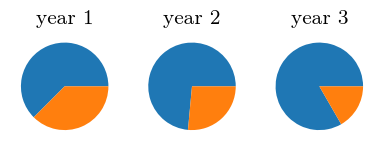

In [4]:
plt.close('all')
fig, ax = plt.subplots(ncols=3, dpi=100)
for idx, row in df.iterrows():
	ax[idx].pie([row.chevaux, row.boeufs], colors=['tab:blue', 'tab:orange'])
	ax[idx].set_title(f'year {row.year}')
plt.show(fig)
fig.savefig('fig1.png', transparent=True)
fig.savefig('fig1.svg', transparent=True)

## Pie charts (scaled)

area is propto the total in the year

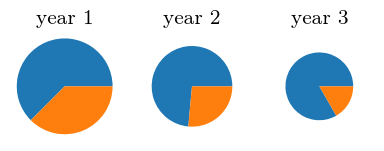

In [5]:
plt.close('all')
fig, ax = plt.subplots(ncols=3, dpi=100)
for idx, row in df.iterrows():
	ax[idx].pie([row.chevaux, row.boeufs], radius=np.sqrt((row.chevaux+row.boeufs)/40), colors=['tab:blue', 'tab:orange'])
	ax[idx].set_title(f'year {row.year}')
plt.show(fig)
fig.savefig('fig2.png', transparent=True)
fig.savefig('fig2.svg', transparent=True)

## Stacked plot

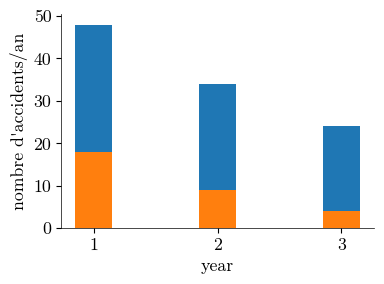

In [6]:
plt.close('all')
fig, ax = plt.subplots(dpi=100, figsize=(4, 3))
ax.bar(df.year, df.boeufs, 0.3, color='tab:orange')
ax.bar(df.year, df.chevaux, 0.3, bottom=df.boeufs, color='tab:blue')
ax.set_ylabel('nombre d\'accidents/an')
ax.set_xticks(df.year)
ax.set_xlabel('year')
plt.show(fig)
fig.savefig('fig3.png', transparent=True)
fig.savefig('fig3.svg', transparent=True)

Avec guides de lecture

Problème : difficile de voir l'évolution individuelle

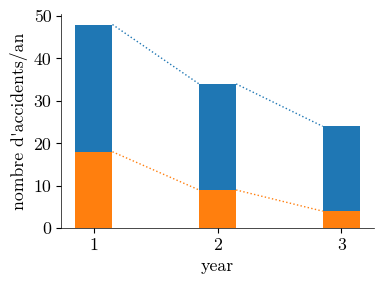

In [7]:
plt.close('all')
fig, ax = plt.subplots(dpi=100, figsize=(4, 3))
bars = []
bars.append(ax.bar(df.year, df.boeufs, 0.3, color='tab:orange'))
bars.append(ax.bar(df.year, df.chevaux, 0.3, bottom=df.boeufs, color='tab:blue'))
for bar in bars:
	for idx in range(len(bar.patches)-1):
		r1, r2 = bar.patches[idx], bar.patches[idx+1]
		b1, b2 = r1.get_bbox(), r2.get_bbox()
		ax.plot(
			[b1.xmax, b2.xmin], [b1.ymax, b2.ymax],
			linestyle='dotted',
			color=r1.get_facecolor()
		)
ax.set_xticks(df.year)
ax.set_xlabel('year')
ax.set_ylabel('nombre d\'accidents/an')
plt.show(fig)
fig.savefig('fig4.png', transparent=True)
fig.savefig('fig4.svg', transparent=True)

Sur des axes séparés

Problème : difficile de voir la proportion

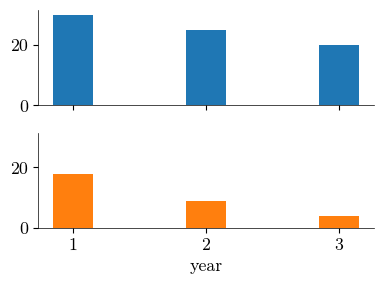

In [8]:
plt.close('all')
fig, ax = plt.subplots(dpi=100, nrows=2, sharex=True, sharey=True, figsize=(4, 3))
ax[0].bar(df.year, df.chevaux, 0.3, color='tab:blue')
ax[1].bar(df.year, df.boeufs, 0.3, color='tab:orange')
ax[1].set_xticks(df.year)
ax[1].set_xlabel('year')
# ax[1].set_ylim()
plt.show(fig)
fig.savefig('fig5.png', transparent=True)
fig.savefig('fig5.svg', transparent=True)

Sur des axes inversés

Problème : possible seulement pour 2 catégories

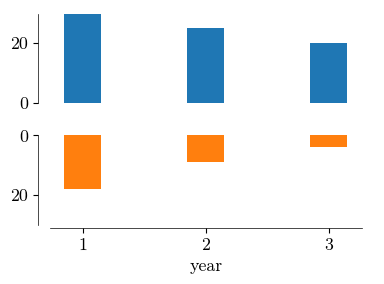

In [9]:
plt.close('all')
fig, ax = plt.subplot_mosaic(
	[[0], [1]],
	# gridspec_kw=dict(wspace=0.0, hspace=0.0),
	dpi=100,
	figsize=(4, 3)
)
ax[0].bar(df.year, df.chevaux, 0.3, color='tab:blue')
ax[1].bar(df.year, df.boeufs, 0.3, color='tab:orange')
ax[1].set_xticks(df.year)
ax[1].set_xlabel('year')
ax[0].xaxis.set_visible(False)
ax[0].spines.bottom.set_visible(False)
ax[0].set_ylim((0, 30))
ax[1].set_ylim((30, 0))
breathe(ax[0])
breathe(ax[1])
plt.show(fig)
fig.savefig('fig6.png', transparent=True)
fig.savefig('fig6.svg', transparent=True)

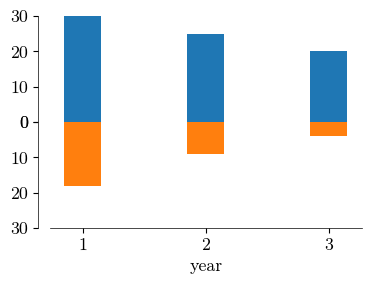

In [10]:
plt.close('all')
fig, ax = plt.subplot_mosaic(
	[[0], [1]],
	gridspec_kw=dict(wspace=0.0, hspace=0.0),
	dpi=100,
	figsize=(4, 3)
)
ax[0].bar(df.year, df.chevaux, 0.3, color='tab:blue')
ax[1].bar(df.year, df.boeufs, 0.3, color='tab:orange')
ax[1].set_xticks(df.year)
ax[1].set_xlabel('year')
ax[0].xaxis.set_visible(False)
ax[0].spines.bottom.set_visible(False)
ax[0].set_ylim((0, 30))
ax[1].set_ylim((30, 0))
breathe(ax[0], 'x')
breathe(ax[1], 'x')
plt.show(fig)
fig.savefig('fig8.png', transparent=True)
fig.savefig('fig8.svg', transparent=True)

Même chose, mais moins d'encre/espace (stemplot)

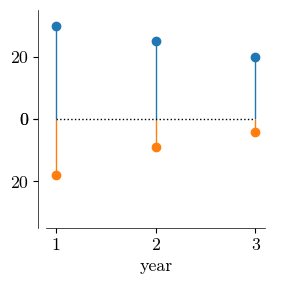

In [11]:
plt.close('all')
fig, ax = plt.subplot_mosaic(
	[[0], [1]],
	gridspec_kw=dict(wspace=0.0, hspace=0.0),
	dpi=100,
	figsize=(3, 3)
)
ax[0].stem(df.year, df.chevaux, linefmt='C1', markerfmt='C1o', basefmt='k:')
ax[1].stem(df.year, df.boeufs, linefmt='C2', markerfmt='C2o', basefmt='k:')
ax[1].set_xticks(df.year)
ax[1].set_xlabel('year')
ax[0].xaxis.set_visible(False)
ax[0].spines.bottom.set_visible(False)
ax[0].set_ylim((0, 35))
ax[1].set_ylim((35, 0))
breathe(ax[0], 'x')
breathe(ax[1], 'x')
plt.show(fig)
fig.savefig('fig9.png', transparent=True)
fig.savefig('fig9.svg', transparent=True)

## biais surfaces

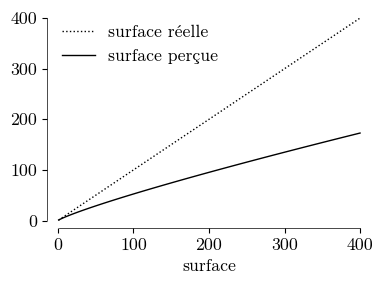

In [12]:
fig, ax = plt.subplots(dpi=100, figsize=(4, 3))
# a = np.linspace(1, 200, 100)
r = np.linspace(1, 20)
a = r**2
ax.plot(a, a, 'k:', label='surface réelle')
ax.plot(a, a**0.86, 'k', label='surface perçue')
ax.legend()
ax.set_xlabel('surface')
data_lim(ax)
breathe(ax)
plt.show()
fig.savefig('fig10.png', transparent=True)
fig.savefig('fig10.svg', transparent=True)

## pie vs bar

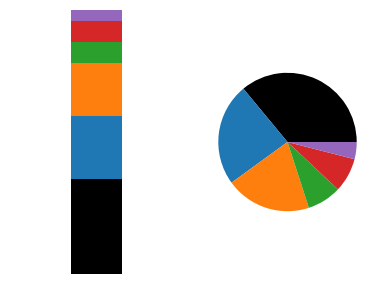

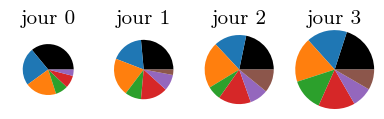

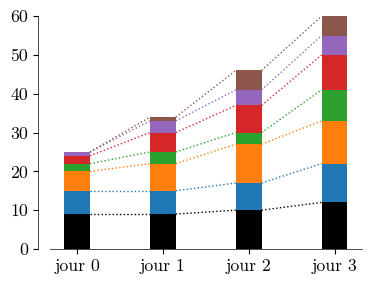

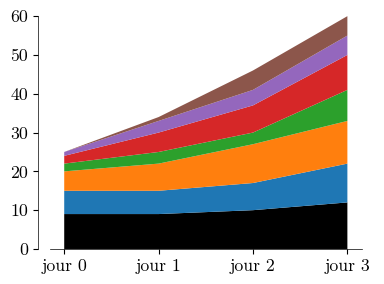

In [147]:
np.random.seed(0)
x = np.empty((4, 7))
x[0, :] = np.sort(np.random.lognormal(size=7))[::-1]
for idx in range(1, x.shape[0]):
	x[idx, :] = x[idx-1, :] + np.abs(np.random.normal(loc=0.5, scale=2, size=7))
x = x.astype(int)

plt.close('all')
fig, ax = plt.subplots(ncols=2)
for idx in range(len(x[0])):
	ax[0].bar([0], [x[0, idx]], 0.3, bottom=sum(x[0, :idx]))
ax[0].set_xlim((-0.5, 0.5))
ax[0].axis('off')
ax[1].pie(x[0])
plt.show()
fig.savefig('fig11.png', transparent=True)
fig.savefig('fig11.svg', transparent=True)

plt.close('all')
fig, ax = plt.subplots(ncols=x.shape[0], dpi=100, facecolor='white')
for idx in range(x.shape[0]):
	ax[idx].pie(x[idx], radius=np.sqrt(x[idx].sum())/6)
	ax[idx].set_title(f'jour {idx}')
plt.show()
fig.savefig('fig12.png', transparent=True)
fig.savefig('fig12.svg', transparent=True)

plt.close('all')
fig, ax = plt.subplots(dpi=100)
bars = []
for idc in range(x.shape[1]):
	bars.append(ax.bar(np.arange(x.shape[0]), x[:, idc], 0.3, bottom=[sum(x_[:idc]) for x_ in x]))
for bar in bars:
	for idx in range(len(bar.patches)-1):
		r1, r2 = bar.patches[idx], bar.patches[idx+1]
		b1, b2 = r1.get_bbox(), r2.get_bbox()
		ax.plot(
			[b1.xmax, b2.xmin], [b1.ymax, b2.ymax],
			linestyle='dotted',
			color=r1.get_facecolor()
		)
ax.set_xticks(np.arange(x.shape[0]))
ax.set_xticklabels([f'jour {i}' for i in np.arange(x.shape[0])])
breathe(ax, 'x')
ax.set_ylim((0, 60))
plt.show()
fig.savefig('fig13.png', transparent=True)
fig.savefig('fig13.svg', transparent=True)

plt.close('all')
fig, ax = plt.subplots(dpi=100)
for idc in range(x.shape[1]):
	ax.fill_between(
		np.arange(x.shape[0]),
		np.sum(x[:, :idc], axis=1) if idc > 0 else np.zeros_like(x[:, idc]),
		np.sum(x[:, :idc+1], axis=1)
	)
ax.set_xticks(np.arange(x.shape[0]))
ax.set_xticklabels([f'jour {i}' for i in np.arange(x.shape[0])])
breathe(ax, 'x')
ax.set_ylim((0, 60))
plt.show()
fig.savefig('fig14.png', transparent=True)
fig.savefig('fig14.svg', transparent=True)

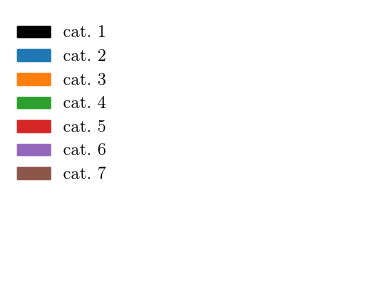

In [203]:
import matplotlib as mpl

plt.close('all')
fig, ax = plt.subplots()
# ax.pie(x[0], labels=[f'cat. {i+1}' for i in range(x.shape[1])])
handles = [mpl.patches.Rectangle((0, 0), 1, 1, color=f'C{i}') for i in range(x.shape[1])]
labels = [f'cat. {i+1}' for i in range(x.shape[1])]
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0, 1))
ax.axis('off')
plt.show()
# fig.savefig('fig_legends.png', transparent=True)
fig.savefig('fig_legends.svg', transparent=True)

In [174]:
df = pd.DataFrame(x, [f'jour {i+1}' for i in range(x.shape[0])], [f'cat. {i+1}' for i in range(x.shape[1])])

In [175]:
df

,cat. 1,cat. 2,cat. 3,cat. 4,cat. 5,cat. 6,cat. 7
jour 1,9,6,5,2,2,1,0
jour 2,9,6,7,3,5,3,1
jour 3,10,7,10,3,7,4,5
jour 4,12,10,11,8,9,5,5


In [180]:
print(df.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>cat. 1</th>
      <th>cat. 2</th>
      <th>cat. 3</th>
      <th>cat. 4</th>
      <th>cat. 5</th>
      <th>cat. 6</th>
      <th>cat. 7</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jour 1</th>
      <td>9</td>
      <td>6</td>
      <td>5</td>
      <td>2</td>
      <td>2</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>jour 2</th>
      <td>9</td>
      <td>6</td>
      <td>7</td>
      <td>3</td>
      <td>5</td>
      <td>3</td>
      <td>1</td>
    </tr>
    <tr>
      <th>jour 3</th>
      <td>10</td>
      <td>7</td>
      <td>10</td>
      <td>3</td>
      <td>7</td>
      <td>4</td>
      <td>5</td>
    </tr>
    <tr>
      <th>jour 4</th>
      <td>12</td>
      <td>10</td>
      <td>11</td>
      <td>8</td>
      <td>9</td>
      <td>5</td>
      <td>5</td>
    </tr>
  </tbody>
</table>


Note percentages do not add up to 100 due to rounding

In [177]:
df_per = pd.concat([
	(df[i] / df.sum(axis=1))\
		.mul(100)
		.round()
		.astype(int)
		.rename(f'{i} (% jour)')
	for i in df.columns
], axis=1)

In [178]:
df_per

,cat. 1 (% jour),cat. 2 (% jour),cat. 3 (% jour),cat. 4 (% jour),cat. 5 (% jour),cat. 6 (% jour),cat. 7 (% jour)
jour 1,36,24,20,8,8,4,0
jour 2,26,18,21,9,15,9,3
jour 3,22,15,22,7,15,9,11
jour 4,20,17,18,13,15,8,8


In [181]:
print(df_per.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>cat. 1 (% jour)</th>
      <th>cat. 2 (% jour)</th>
      <th>cat. 3 (% jour)</th>
      <th>cat. 4 (% jour)</th>
      <th>cat. 5 (% jour)</th>
      <th>cat. 6 (% jour)</th>
      <th>cat. 7 (% jour)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jour 1</th>
      <td>36</td>
      <td>24</td>
      <td>20</td>
      <td>8</td>
      <td>8</td>
      <td>4</td>
      <td>0</td>
    </tr>
    <tr>
      <th>jour 2</th>
      <td>26</td>
      <td>18</td>
      <td>21</td>
      <td>9</td>
      <td>15</td>
      <td>9</td>
      <td>3</td>
    </tr>
    <tr>
      <th>jour 3</th>
      <td>22</td>
      <td>15</td>
      <td>22</td>
      <td>7</td>
      <td>15</td>
      <td>9</td>
      <td>11</td>
    </tr>
    <tr>
      <th>jour 4</th>
      <td>20</td>
      <td>17</td>
      <td>18</td>
      <td>13</td>
      <td>15</td>
      <td>8</td>
      <td>8</td>
    </